In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import librosa
import librosa.display

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam

D:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df=pd.read_csv("F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Metadata_Train.csv")
df2=pd.read_csv("F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Metadata_Test.csv")

# Extracting Features from Audio Dataset

In [3]:
def Feature_extractor(file):
    
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features =np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [4]:
extracted_features=[]

for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath('F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Train_submission/Train_submission/'),str(row["FileName"]))
    final_class_label=row["Class"]
    data=Feature_extractor(file_name)
    extracted_features.append([data,final_class_label])

2629it [08:42,  5.03it/s]


In [5]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

features         class
0  [-388.4289, 205.19734, 7.863611, 39.286667, 13...  Sound_Guitar
1  [-359.54538, 171.62688, 10.192535, 37.61143, 1...  Sound_Guitar
2  [-347.31915, 178.11375, 2.1611729, 38.960228, ...  Sound_Guitar
3  [-389.92075, 177.8204, 10.302906, 42.16702, 14...  Sound_Guitar
4  [-372.23615, 161.71027, 10.579021, 45.089127, ...  Sound_Guitar

In [6]:
extracted_features_df.drop(extracted_features_df[extracted_features_df['class'] == 'Sound_Violin'].index, inplace = True)
print(extracted_features_df)

                                               features         class
0     [-388.4289, 205.19734, 7.863611, 39.286667, 13...  Sound_Guitar
1     [-359.54538, 171.62688, 10.192535, 37.61143, 1...  Sound_Guitar
2     [-347.31915, 178.11375, 2.1611729, 38.960228, ...  Sound_Guitar
3     [-389.92075, 177.8204, 10.302906, 42.16702, 14...  Sound_Guitar
4     [-372.23615, 161.71027, 10.579021, 45.089127, ...  Sound_Guitar
...                                                 ...           ...
2624  [-340.21155, 139.1595, -60.4157, 31.669538, -3...   Sound_Piano
2625  [-369.3724, 226.2567, -21.618788, -10.902158, ...   Sound_Piano
2626  [-355.47946, 168.51161, 16.122873, 8.280934, 1...   Sound_Piano
2627  [-625.0007, 124.98744, 62.213802, 22.684887, 1...   Sound_Piano
2628  [-606.0592, 68.92803, 3.5502226, 3.2627034, -1...   Sound_Piano

[1929 rows x 2 columns]


In [8]:
X=np.array(extracted_features_df['features'].tolist())
Y=np.array(extracted_features_df["class"].tolist())

In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=to_categorical(LE.fit_transform(Y))

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(1543, 40)

In [11]:
from sklearn.model_selection import train_test_split
X_actual_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [12]:
print("Shape Of X_train:",X_actual_train.shape)
print("Shape Of X_test:",X_test.shape)
print("Shape Of y_train:",y_train.shape)
print("Shape Of y_test:",y_test.shape)
print("Shape Of y_validation:",y_validation.shape)

Shape Of X_train: (1234, 40)
Shape Of X_test: (386, 40)
Shape Of y_train: (1234, 3)
Shape Of y_test: (386, 3)
Shape Of y_validation: (309, 3)


In [13]:
from tensorflow.keras.models import Sequential, model_from_json
def loadmodel():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")

    # evaluate loaded model on test data
    loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return loaded_model

In [14]:
model = loadmodel()

Loaded model from disk


In [15]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9663212299346924


In [16]:
y_pred = [np.argmax(i) for i in model.predict(X_test)]
y_true = [np.argmax(i) for i in y_test]

13/13 [==============================] - 0s 1ms/step


In [17]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score Macro',accuracy_score(y_true,y_pred)*100,'%')
print('Precision Score Macro',precision_score(y_true,y_pred,average = 'macro')*100,'%')
print('Recall_Score Macro',recall_score(y_true,y_pred, average = 'macro')*100,'%')
print('F1_Score Macro',f1_score(y_true,y_pred, average = 'macro')*100,'%')


print(sklearn.metrics.classification_report(y_true,y_pred))

Accuracy Score Macro 96.6321243523316 %
Precision Score Macro 96.78312879238949 %
Recall_Score Macro 96.40340700166102 %
F1_Score Macro 96.55061407301409 %
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       127
           1       0.95      0.99      0.97       144
           2       0.98      0.92      0.95       115

    accuracy                           0.97       386
   macro avg       0.97      0.96      0.97       386
weighted avg       0.97      0.97      0.97       386



Text(0.5, 1.0, ' Confusion Matrix')

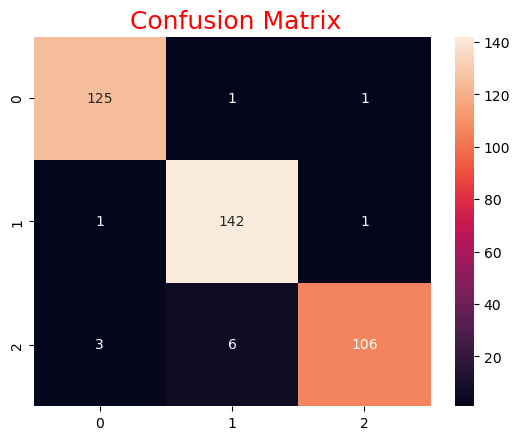

In [18]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_true,y_pred ), annot=True, fmt=".0f")
plt.title(" Confusion Matrix",fontsize=18, color="red")

In [26]:

filename="F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Test_submission/Test_submission/100 year old piano music l 30 sec piano sound.wav"
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features =np.mean(mfccs_features.T,axis=0)

#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)

predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)

if predicted_label[0] == 1:
    print("This is played by Guitar")
elif predicted_label[0] == 2 :
    print("This is played by Piano")
elif predicted_label[0] == 0 :
    print("This is played by Drum")


1/1 [==============================] - 0s 21ms/step
[2]
This is played by Piano


In [27]:
import IPython.display as ipd 
ipd.Audio(filename)